<a href="https://colab.research.google.com/github/Tahan402/Capstone--1/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#import librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#playstore_db=pd.read_csv(r"https://drive.google.com/file/d/1OKtVHS

Mounted at /content/drive


In [ ]:
playstore_db=pd.read_csv('/content/drive/My Drive/Almabetter/Play Store Data.csv')

In [ ]:
playstore_db.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#shape of datasets
playstore_db.shape

(10841, 13)

In [ ]:
#information about each Columns
playstore_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Inference:- 
We see above the information which two cells of code provide is data has 10841 rows and 13 columns in which the rating column has most of the null values.



In [ ]:
#how much columns in datasets
playstore_db.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#datasets numeric details
playstore_db.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Cleaning of Play Store Data**
We will mostly be working with these columns: "Rating", "Size", "Installs", "Price".First we clean up all the nan values in this column, either replace them with some other value or remove all the special characters that are present in the particular column. Let's clean up by removing these and converting each column to a numeric type.

In [ ]:
# Make a dataframe to gain insight into the data. 
ps_df=pd.DataFrame(index=playstore_db.columns)
ps_df["DataType"]=playstore_db.dtypes
ps_df["not_null"]=playstore_db.count()
ps_df["null"]=playstore_db.isnull().sum()
ps_df

,DataType,not_null,null
App,object,10841,0
Category,object,10841,0
Rating,float64,9367,1474
Reviews,object,10841,0
Size,object,10841,0
Installs,object,10841,0
Type,object,10840,1
Price,object,10841,0
Content Rating,object,10840,1
Genres,object,10841,0


Inference:


Rating columns has 1474 null values.type has 1.content rating has 1 current ver has 8. android ver has 3 null values

Reviews,Size, Intalls, and Price have default datatypes. We want to convert them into numeric datatypes.
and removed all the special characters present in these columns, which made them default datatype.

# Handling the NaN values

### Ratings:1474 null values

In [ ]:
#rows containg null values
playstore_db[playstore_db['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Let's check the rating of the app We all know the rating of the app comes across from 1 to 5.


In [ ]:
playstore_db[(playstore_db['Rating'] <1) | (playstore_db['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We see in this row that the rating is 19, which is not at all possible. We should drop these rows because they do not affect our data set. This is also an outlier in the dataset.

In [ ]:
#drop row by his index number.
playstore_db.drop(10472,axis=0,inplace=True)
playstore_db

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#lets see row is drop or not
playstore_db[(playstore_db['Rating'] <1) | (playstore_db['Rating']>5)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
#rating has 1473 null values remaining lets find mean and median of the rating column
mean_of_rating=playstore_db['Rating'].mean()
print(f"The mean of Rating Column {mean_of_rating}")
median_of_rating=playstore_db['Rating'].median()
print(f"The median of Rating Column {median_of_rating}")

The mean of Rating Column 4.191757420456972
The median of Rating Column 4.3




*   The mean of Rating Column comes to be 4.2
*   The Median of Rating Column comes to be 4.3
*   There is not much difference between mean and median, so we replace all the null values with median because it shows that 50% of apps have more than 4.3.



In [ ]:
playstore_db['Rating'].fillna(value=median_of_rating,inplace=True)

In [ ]:
#check Rating column has any null value remaining
playstore_db[(playstore_db['Rating'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
playstore_db['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit.

In [ ]:
playstore_db['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

Unwanted character $ appears in the price column

In [ ]:
playstore_db['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

'+' and ',' both unwanted character is appear in intalls column 

In [ ]:
# we want to Replace all the unwanted character to convert datatye to numeric 
def clean_it(num):
  """This function takes a string and replace the following characters if present, '+', ',' ,'$', 'M', 'k', 'NaN'"""
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'M' in num:
    num = str(int(float(num.replace('M',''))*1000000))
  if 'k' in num:
    num = str(int(float(num.replace('k',''))*1000))
  if 'NaN' in num:
    num = '0'
  else:
    pass
  return num

In [ ]:
#Changing the 'Reviews' column values into valid numeric values
playstore_db['Reviews'] = pd.to_numeric(playstore_db['Reviews'])

#Changing the 'Size' column values into valid numeric values
playstore_db['Size'] = playstore_db['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_db['Size'] = pd.to_numeric(playstore_db['Size'].map(lambda x: clean_it(x)))

#Changing the 'Installs' column values into valid numeric values
playstore_db['Installs'] = pd.to_numeric(playstore_db['Installs'].map(lambda x: clean_it(x)))

#Changing the 'Price' column values into valid numeric values
playstore_db['Price'] = pd.to_numeric (playstore_db['Price'].map(lambda x:clean_it(x)))
playstore_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  int64  
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


# Handling Duplicates Value

In [ ]:
playstore_db.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
# Only the 'App' column has duplicated values.
playstore_db['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

There are many duplicated values in the app column, and we should remove all of them. 

In [ ]:
#dropping duplicates value in 'App' column using drop_duplicates() fuction
playstore_db.drop_duplicates(subset='App',inplace=True)


In [ ]:
playstore_db.shape

(9659, 13)

we drop all the duplicates values

In [ ]:
playstore_db['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

Summary:Data Cleaning


*   Remove or replace all the null values.
*   Convert the datatypes of the particular column and remove all the unwanted characters.

*   Remove Duplicates from datasets







# Data Cleaning on User Review Data

In [ ]:
user_review_db=pd.read_csv('/content/drive/My Drive/Almabetter/User Reviews.csv')

In [ ]:
user_review_db.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_review_db.shape

(64295, 5)

In this data set we have 64295 columns and 5 rows

lets Check about NaN vlues 

In [ ]:
user_review_db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
ur_df=pd.DataFrame(index=user_review_db.columns)
ur_df['DataType']=user_review_db.dtypes
ur_df['Notnull']=user_review_db.count()
ur_df['Null']=user_review_db.isnull().sum()
ur_df

,DataType,Notnull,Null
App,object,64295,0
Translated_Review,object,37427,26868
Sentiment,object,37432,26863
Sentiment_Polarity,float64,37432,26863
Sentiment_Subjectivity,float64,37432,26863


Above we see lots of null values in translated_review,sentimwnt,sentiment_polarity,sentiment_subjectivity.

In [ ]:
#lets check sentiment column
user_review_db[user_review_db['Sentiment'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
user_review_db['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

Inference:
We see nearly all of the columns with sentiment contant null values in the above analysis, and we don't replace null values with any because they are categorical values. 

so we drop all the null values from datasets

In [ ]:
user_review_db.dropna(inplace = True)

In [ ]:
user_review_db.shape

(37427, 5)

In [ ]:
user_review_db.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


The values in the Sentiment_Polarity and Sentiment_Subjectivitylooks correct.

We can now examine this data flow and create user-friendly visuals.

## ***Exploratory Data Analysis (EDA) ***

# 1.Find out app share in the playstore category wise?

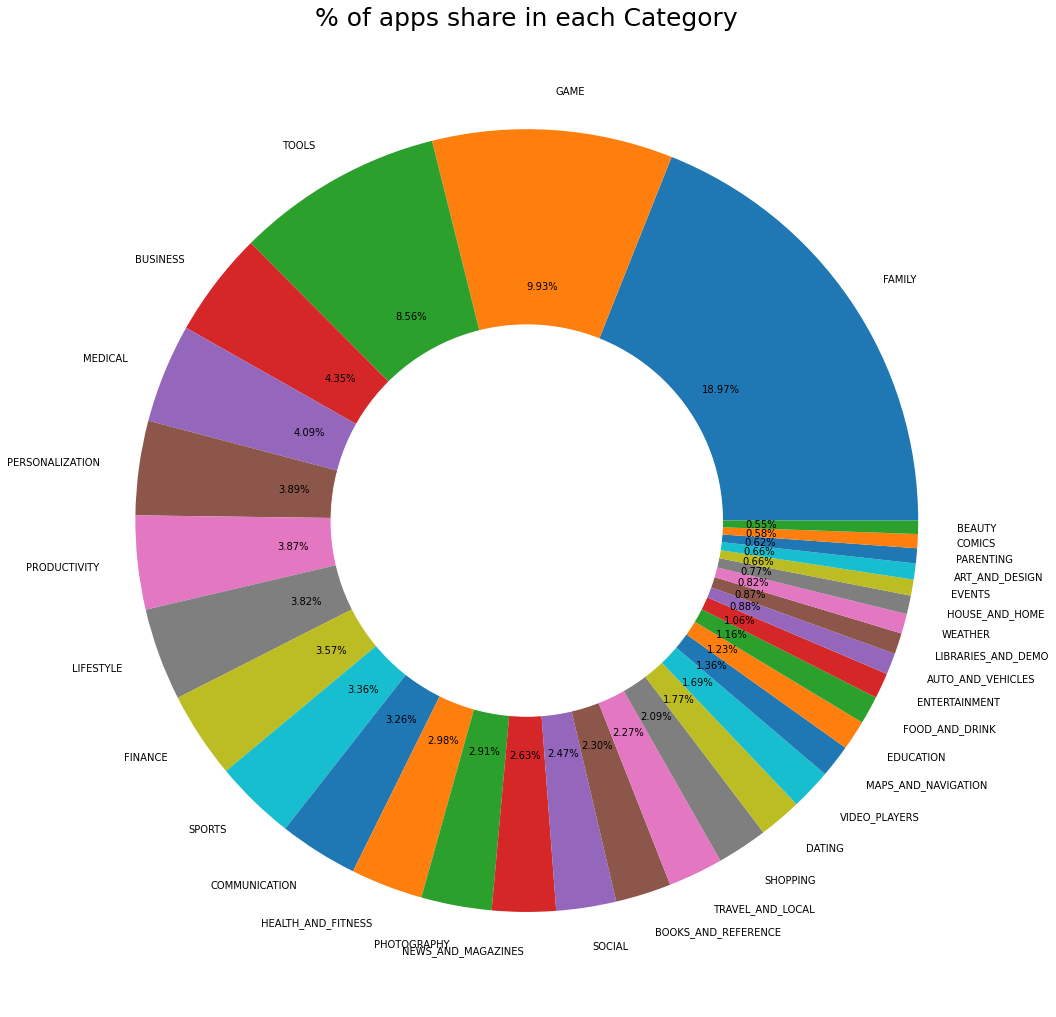

In [ ]:
#Category
plt.figure(figsize=(18,18))
plt.pie(playstore_db.Category.value_counts(), labels=playstore_db.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

Inference:

 we see that family accounts for 18.97% of all of them, while games and tools account for 9.93% and 8.56%, respectively. 

## 2.What category of app is most installed by users?

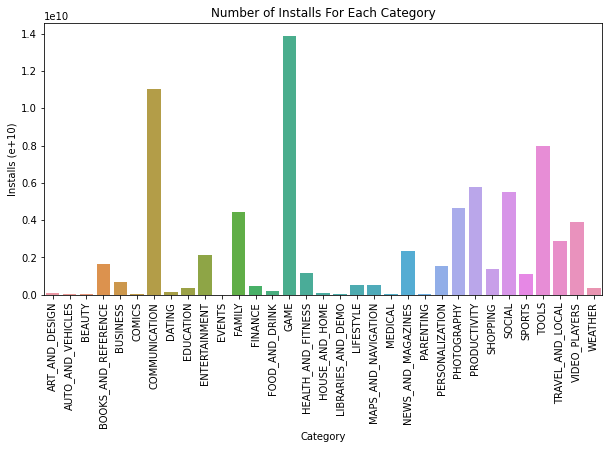

In [ ]:
 #get the number of installs for each category
categories = playstore_db.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

Inference:

 the weightage of games and communication is much higher than all other categories.

### **3. Which apps  install most in particular category?**

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = playstore_db[playstore_db['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "viridis")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

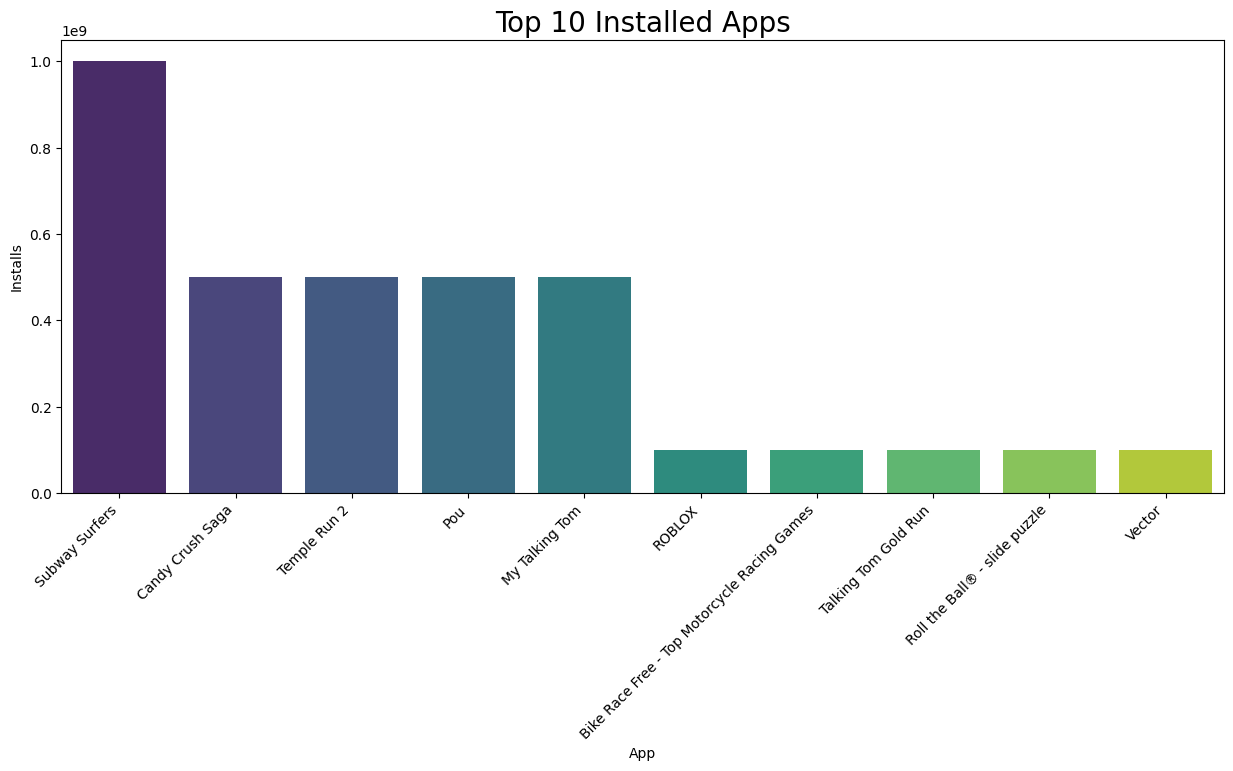

In [ ]:
findtop10incategory('GAME')

## 4.Which category of Apps from the ‘Content Rating’ column is found more on the play store?

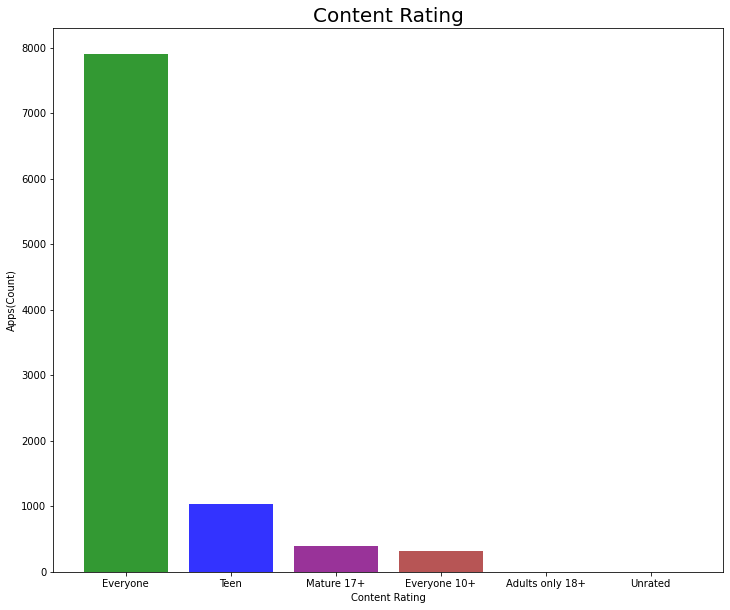

In [ ]:
plt.figure(figsize=(12,10))
color=['green','blue','purple','brown','teal']
plt.bar(playstore_db['Content Rating'].value_counts().index,playstore_db['Content Rating'].value_counts(),color=color,width=0.8, alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

In [ ]:
playstore_db['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Inference:

Most of the applications are belongs to “Everyone” which means not restricted to age.


## 5.How much does the app paid or how much is free?

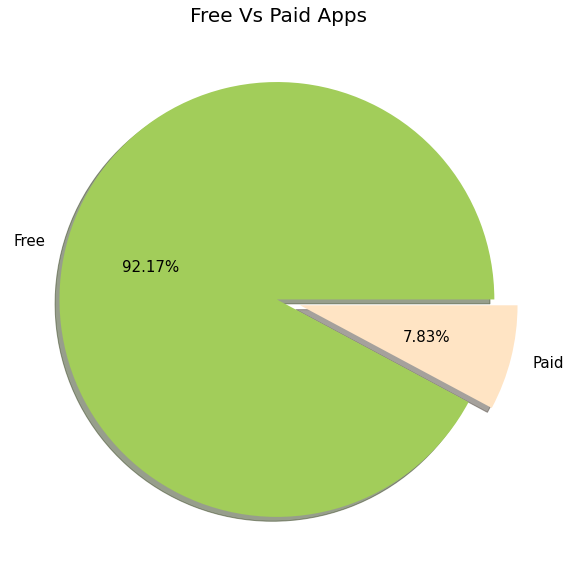

In [ ]:
paid_or_free=playstore_db['Type'].value_counts()
labels=playstore_db['Type'].value_counts().index

#create pie chart 
plt.figure(figsize=(12,10))
colors=['#A2CD5A','#FFE4C4']
explode=(0.01,0.1)
plt.pie(paid_or_free,labels=labels,colors=colors,autopct='%.2f%%',explode=explode,shadow=True,textprops={'fontsize': 15})
plt.title('Free Vs Paid Apps',Size=20)
plt.show()


In [ ]:
playstore_db['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

Inference: From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

From the above data, we also see value counts of free and paid apps.

# 6. Distribution of apps in term of their rating, size and type.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


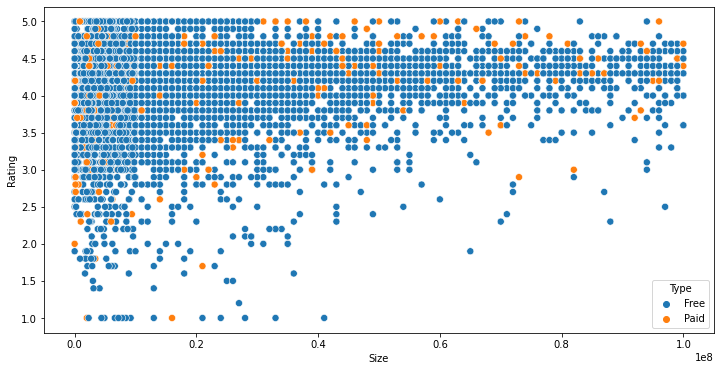

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(playstore_db['Size'], playstore_db['Rating'],hue=playstore_db['Type'],s=50)

Inference:


From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

## 7.Find the top 10 apps that are free or paid.

In [ ]:
top_app_df = playstore_db[playstore_db['Installs'] == playstore_db['Installs'].max()]
top10_apps=top_app_df.nlargest(10, 'Installs', keep='first')
top10_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,0,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,0,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000000,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


Inference:
As we see in the above table, all the 10 apps are free for Google Play store users.

## 8.Which genres have most of the app counts?

In [ ]:
playstore_db['Genres'].value_counts()

Tools                              826
Entertainment                      561
Education                          510
Business                           420
Medical                            395
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: Genres, Length: 118, dtype: int64

In [ ]:
topapp_genres=playstore_db['Genres'].value_counts().head(15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


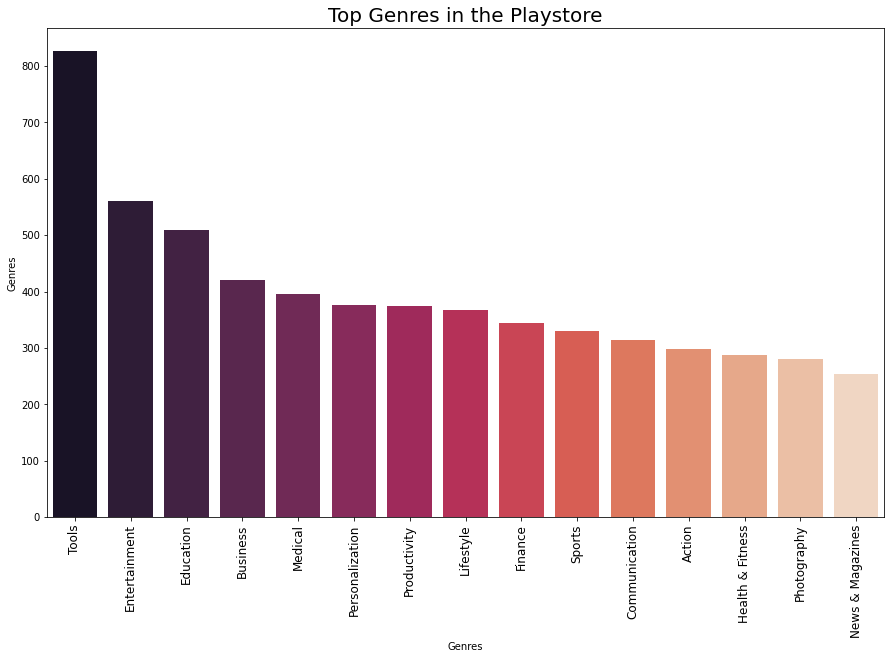

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres (App Count)')
plt.xlabel('Genres')
graph = sns.barplot(topapp_genres.index,topapp_genres,palette="rocket")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

Inference:
There are 118 Genres on total, above plot which shows only top 15. Observed most of the applications falls under the Genre “Tool” followed by "Entertainment","Education", and "Business"

## **9.Correlation between all the columns of the datasets.**

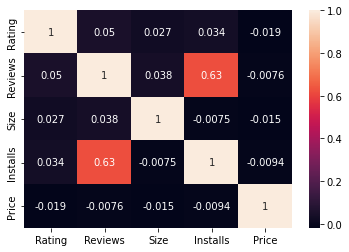

In [ ]:
Corr_data=playstore_db.corr()
sns.heatmap(Corr_data,annot=True)
plt.show()

 

Clearly, we saw that reviews and instals are more correlated and the value is 0.64. It is much more obvious that a higher number of instals has a higher number of reviews.


There is a negative correlation between price and instal apps, with the price of the app influencing the number of installation of the app.



# EDA ON USER REVIEW DATASET

In [ ]:
#basic review of the data
user_review_db.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

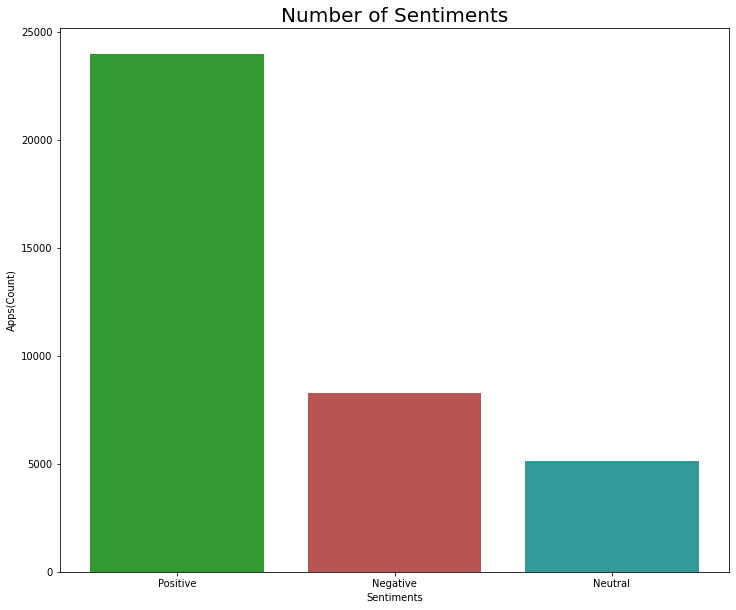

In [ ]:
#check about user sentiments
plt.figure(figsize=(12,10))
color=['green','brown','teal']
plt.bar(user_review_db['Sentiment'].value_counts().index,user_review_db['Sentiment'].value_counts(),color=color,width=0.8, alpha=0.8);
plt.title('Number of Sentiments',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Sentiments');

In [ ]:
user_review_db['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

Inference:
Almost 50% and more apps has positive review.

# Inference and Conclusion:

In this project of analysing play store applications, we have worked on several parameters and got some actionable insights that would help any organisation to do well in the Android market.

As per as EDA shown above,


1.   Most of the market is cover by 'FAMILY' category follows by 'GAME' and
'TOOLS'. 
2. The weightage of the intallation of the app, which belongs to the games and communication categories, is much higher than all other categories.The subway suffers from a large number of installations.
3.Most of the applications are belongs to “Everyone” which means not restricted to age.Focusing more on content available for Everyone will increase the chances of getting the highest installs.
4.we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.So we concentrated on free apps and sizes that are compatible with every Android device. 
5.We also found any correlation between all the columns and we found that instals and reviews are highly correlated, which concludes that a high number of instals has the highest number of reviews. 

6.   Finally, we saw the sentiments of the user review data, and we found most of the reviews are of positive sentiment, while negative and neutral sentiments have a low number of reviews.







